# COMP3211 Assigment2 - Image Segmentation using K-Means

## Problem 1: K-means based Unsupservised Segmentation

### Importing the libraries and papreprocessing the data

(330, 500, 3)


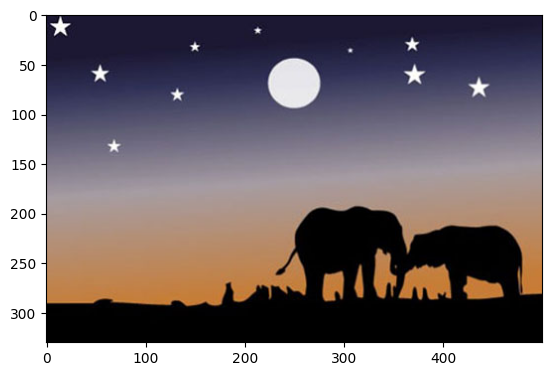

(165000, 3)


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape

print(im.shape)
plt.imshow(im) # as RGB Format
plt.show()

# Flatten Each channel of the Image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

### Q1. Implement your K-Means Clustering

In [8]:
def k_means_algorithm(n_clusters: int, all_pixels: np.ndarray):
    """
    Applies K-Means clustering on the provided pixel data to segment an image based on color attributes.

    Parameters:
    - n_clusters (int): The number of clusters or segments desired in the output.
    - all_pixels (np.ndarray): A 2D numpy array of shape (h x w, 3). Each row represents a pixel with its RGB values.

    Returns:
    - n_clusters: A numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.
    - labels: A numpy array of shape (h x w) where each value is an integer label from 0 to (n_clusters-1), indicating the cluster to which each pixel belongs.
    """
    ######################## Your Implementation #############################
    #centroids = np.random.uniform(np.amin(all_pixels, axis = 0), np.amax(all_pixels, axis = 0),
                                  #size = (n_clusters, all_pixels.shape[1]))

    random_indices = np.random.choice(all_pixels.shape[0], n_clusters, replace=False)
    centroids = all_pixels[random_indices]

    labels = []
    diff = 0.1

    while diff >= 0.0001:
        labels = []

        for pixel in all_pixels:
            distances = np.sqrt(np.sum((centroids - pixel) **2, axis = 1))
            cluster_num = np.argmin(distances)
            labels.append(cluster_num)

        labels = np.array(labels)

        cluster_indices = []
        for i in range(n_clusters):
            cluster_indices.append(np.argwhere(labels == i))

        cluster_centers = []
        empty_clusters = 0
        for i, indices in enumerate(cluster_indices):
            if len(indices) == 0:
                empty_clusters += 1
                cluster_centers.append(centroids[i])
            else:
                cluster_centers.append(np.mean(all_pixels[indices], axis=0)[0])

        if empty_clusters > 0:
            print(f"Warning: {empty_clusters} empty clusters detected.")

        diff = np.max(centroids - np.array(cluster_centers))

        if (diff< 0.0001):
            n_clusters = centroids 
        else:
            centroids = np.array(cluster_centers)
    ######################## End of Your Implementation ######################
    return n_clusters, labels

dominant_colors = 4
centers, labels = k_means_algorithm(dominant_colors, all_pixels)

# Convert to Integer format
centers = np.array(centers, dtype='uint8')

### Q2.1 What kind of color are cluster centers presented?

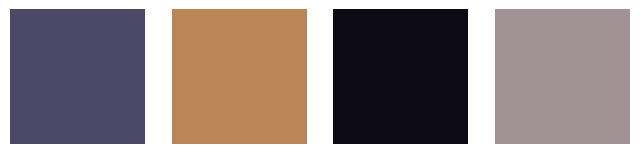

In [9]:
def analysis_colors_and_plot(centers: np.ndarray):
    """
    Analyzes the RGB values of the cluster centers and provides a description of the colors.
    Additionally, it plots the colors for a visual representation.

    Parameters:
    - centers (np.ndarray): A 2D numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.

    Returns:
    - colors: A list of color(maybe int tuple) where each is a description of the color represented by the corresponding cluster center.
    """
    colors = []
    plt.figure(0,figsize=(8,2))

    # Storing info in color array
    colors = []
    i = 1

    for each_col in centers:
        plt.subplot(1,centers.shape[0],i)
        plt.axis("off")
        i+=1
        
        colors.append(each_col)
        
        # Color Swatch
        a = np.zeros((100,100,3),dtype='uint8')
        a[:,:,:] = each_col
        plt.imshow(a)
        
    plt.show()
    return colors

colors = analysis_colors_and_plot(centers)

### Show the segmented images

In [5]:
# Iterate over the image
def match_color_to_all_pixels(colors: list, labels: np.ndarray, new_img: np.ndarray, original_shape: tuple) -> np.ndarray:
    """
    Maps the cluster centroids (colors) to the original image pixels based on the labels.

    Parameters:
    - colors (list): A 2D numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.
    - labels (np.ndarray): A 1D numpy array of shape (h x w) where each value is an integer label from 0 to (n_clusters-1), indicating the cluster to which each pixel belongs.
    - new_img (np.ndarray): A numpy array to store the resultant segmented image. It should have the same shape as the original image.
    - original_shape (tuple): A tuple representing the original shape of the image, i.e., (h, w, 3).

    Returns:
    - np.ndarray: The resultant segmented image.
    """
    
    for ix in range(new_img.shape[0]):
        new_img[ix] = colors[labels[ix]]
        
    new_img = new_img.reshape((original_shape))
      
    return new_img

width, height, chanles = im.shape
new_img = np.zeros((width*height,chanles),dtype='uint8')
print(new_img.shape)

new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)

plt.imshow(new_img)
plt.show() 



(165000, 3)


NameError: name 'colors' is not defined

### Q2.2 Please show the segmented images for different values of K = 2, 4, 6, 8, 10, draw in one line

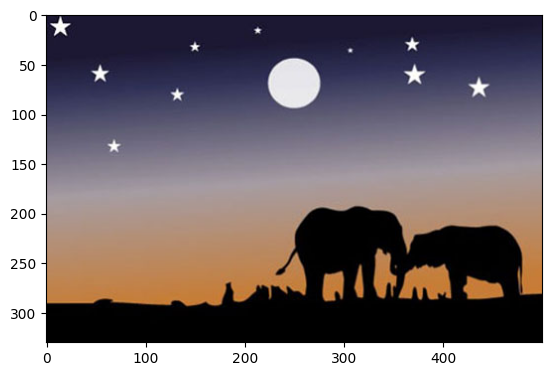

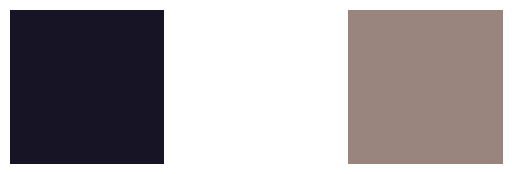

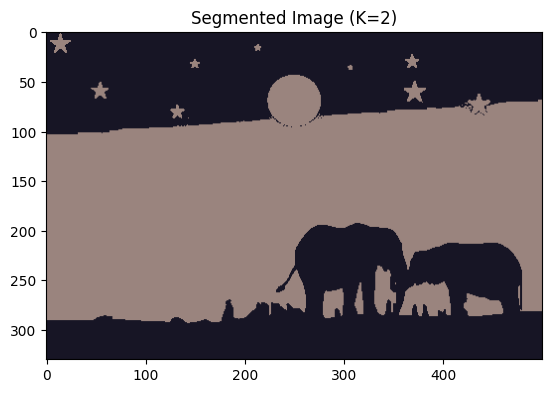

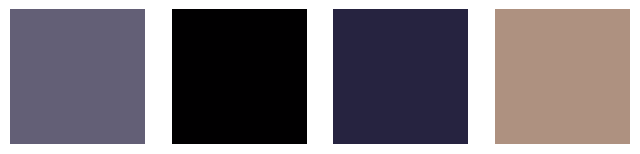

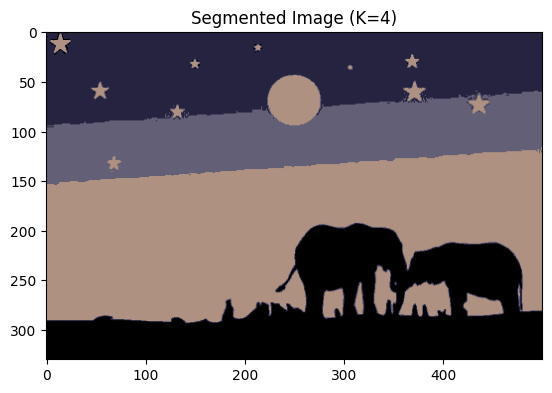

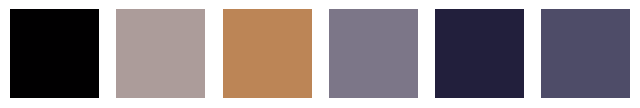

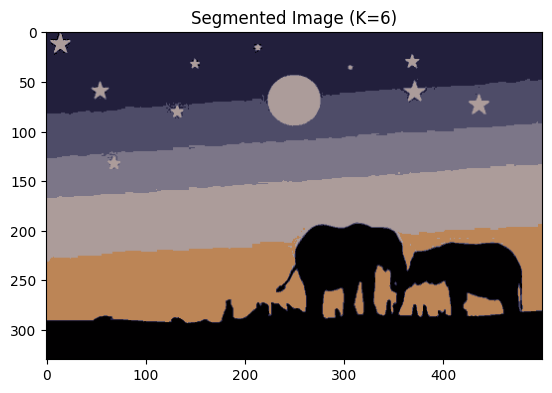

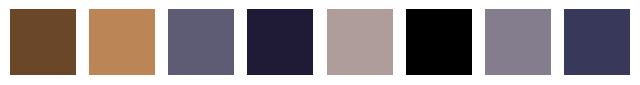

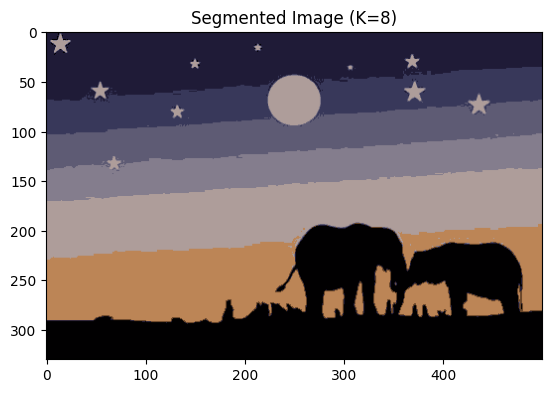

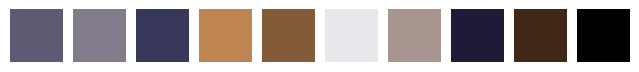

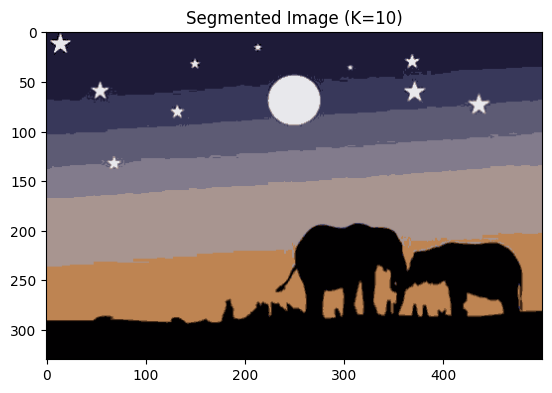

In [5]:
######################## Your Implementation #############################

im = cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
original_shape = im.shape

plt.imshow(im) # as RGB Format
plt.show()

# Flatten Each channel of the Image
all_pixels = im.reshape((-1, 3))

dominant_colors = [2, 4, 6, 8, 10]
for n_clusters in dominant_colors:
    centers, labels = k_means_algorithm(n_clusters, all_pixels)

    # Convert to Integer format
    centers = np.array(centers, dtype='uint8')

    colors = analysis_colors_and_plot(centers)

    new_img = np.zeros(all_pixels.shape, dtype='uint8')

    new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)

    plt.imshow(new_img)
    plt.title(f"Segmented Image (K={n_clusters})")
    plt.show()

######################## End of Your Implementation ######################

### Example for features and segmentation via FCN

C:\Users\1013h\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


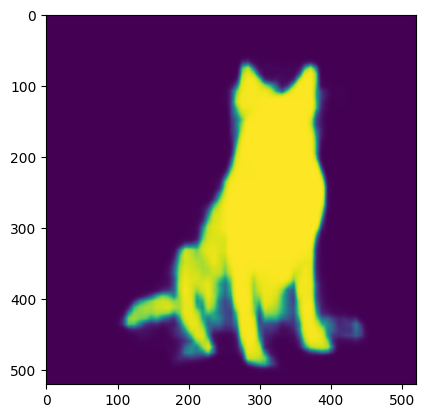

In [16]:
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt

img = read_image("./dog.jpg")

# Step 1: Initialize model with the best available weights
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and visualize the prediction
prediction = model(batch)["out"]

normalized_masks = prediction.softmax(dim=1)
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
mask = normalized_masks[0, class_to_idx["dog"]]
mask_img = to_pil_image(mask)

plt.imshow(mask_img)



### Q3. Segment image via features from FCN and K-means, set K = 2, 4, 6, 8

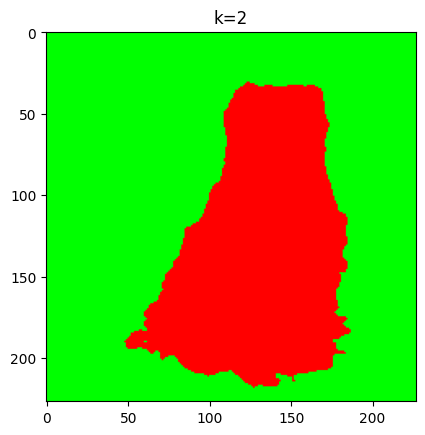

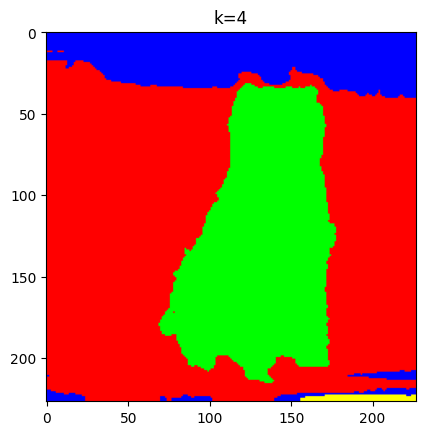

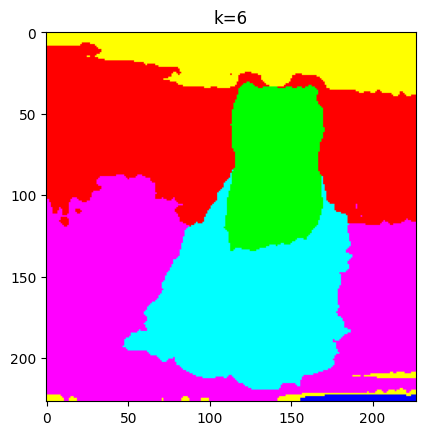

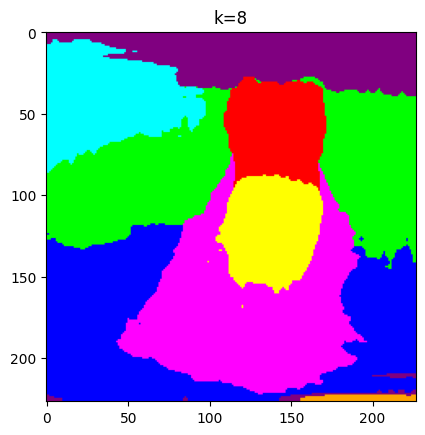

In [17]:
from torch.nn import functional as F
import numpy as np

orginal_features = model.backbone(batch)["out"]
features = F.interpolate(orginal_features, size=img.shape[-2:], mode="bilinear", align_corners=False)
features = (features.squeeze(0).reshape((2048, -1))).permute(1, 0).detach().numpy() # Now, features is of shape (H*W, C), where C is learned features instead of colors

# Perform k-means clustering on the features
dominant_colors = [2, 4, 6, 8]
colors = [(255, 0, 0),    
          (0, 255, 0),   
          (0, 0, 255),   
          (255, 255, 0),  
          (255, 0, 255),  
          (0, 255, 255),  
          (128, 0, 128), 
          (255, 165, 0)] 

for i in dominant_colors:
    centers, labels = k_means_algorithm(i, features)
    channels, width, height = img.shape

    # Convert to Integer format
    centers = np.array(centers, dtype='uint8')
    
    
    
    # Create a new image with the clustered feature colors
    
    new_img = np.zeros((width * height, channels), dtype='uint8')
    new_img = match_color_to_all_pixels(colors, labels, new_img, (width, height, channels))
    new_img = new_img.reshape((width, height, channels))
    
    # Display the new image
    plt.imshow(new_img)
    plt.title(f'k={i}')
    plt.show()

######################## End of Your Implementation ######################

In [ ]:
chanles, height, width  = img.shape
ogrinal_shape = (height, width, chanles)

new_img = np.zeros((width*height,chanles), dtype='uint8')

colors = [(255, 0, 0),    
          (0, 255, 0),   
          (0, 0, 255),   
          (255, 255, 0),  
          (255, 0, 255),  
          (0, 255, 255),  
          (128, 0, 128), 
          (255, 165, 0)] 

new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)
new_img = new_img.reshape((height, width, chanles))

plt.imshow(new_img)
plt.show()

## Problem 2: A* for Maze Searching (extra program file required)

In [15]:
import heapq
import argparse
import math

parser = argparse.ArgumentParser()
parser.add_argument("-m", "--maze", required = True, help = "maze filename")
parser.add_argument("-p", "--path", required = True, help = "path filename")
parser.add_argument("-n", "--nodes", required = True, help = "nodes filename")
args = parser.parse_args()

def read_maze(file_path):
    with open(file_path, 'r') as file:
        dimensions = file.readline()  # Read the dimensions line and discard it
        maze = [list(map(int, line.strip().split())) for line in file.readlines()]
    return maze

def write_output(maze, path, nodes, student_id):
    path_maze = [row.copy() for row in maze]
    nodes_maze = [row.copy() for row in maze]

    for p in path:
        path_maze[p[0]][p[1]] = 2
    
    for n in nodes:
        nodes_maze[n[0]][n[1]] = 3

    with open(args.path, 'w') as file:
        file.write(str(student_id) + '\n')
        for row in path_maze:
            file.write(''.join(map(str, row)) + '\n')

    with open(args.nodes, 'w') as file:
        file.write(str(student_id) + '\n')
        for row in nodes_maze:
            file.write(''.join(map(str, row)) + '\n')

def a_star_algorithm(maze, start, goal):

    def heuristic(node):
        h_value = 0
        h = 3  
        
        if h == 1:
            h_value = 0
        elif h == 2:
            h_value = height - node[0] + width - node[1]
        elif h == 3:
            h_value = math.sqrt((node[0] - goal[0])**2 + (node[1] - goal[1])**2)
        
        return h_value

    h = heuristic
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    start_g = 0
    start_h = h(start)
    start_node = (start, start_g, start_h)
    open_list = [start_node]
    closed_list = set()
    
    previous = {}
    path = []
    nodes = []
    
    while open_list:
        current = heapq.heappop(open_list)
        current_loc = current[0]
    
        if current_loc == goal:
            path = []
            while current_loc in previous:
                path.append(current_loc)
                current_loc = previous[current_loc]
            path.append(start)
            path.reverse()
            closed_list.add(goal)
            return path, list(closed_list)
    
        closed_list.add(current_loc)
    
        for delta_row, delta_col in directions:
            neighbor = (current_loc[0] + delta_row, current_loc[1] + delta_col)
    
            if (neighbor[0] < 0 or neighbor[1] < 0 or neighbor[0] >= len(maze) or neighbor[1] >= len(maze[0]) or
                    maze[neighbor[0]][neighbor[1]] == 1 or neighbor in closed_list):
                continue
    
            neighbor_g = current[1] + 1
            neighbor_node = None
    
            for node in open_list:
                if node[0] == neighbor:
                    neighbor_node = node
                    break
    
            if neighbor_node is None:
                neighbor_node = (neighbor, float('inf'), float('inf'))
    
            if neighbor_g >= neighbor_node[1]:
                continue
    
            previous[neighbor] = current_loc
            heapq.heappush(open_list, (neighbor, neighbor_g, neighbor_g + h(neighbor)))

    return path, nodes

maze_file = args.maze
maze = read_maze(maze_file)
start = (0, 0)
goal = (len(maze) - 1, len(maze[0]) - 1)
path, nodes = a_star_algorithm(maze, start, goal)
output = write_output(maze, path, nodes, 20813439)

usage: ipykernel_launcher.py [-h] -m MAZE -p PATH -n NODES
ipykernel_launcher.py: error: the following arguments are required: -m/--maze, -p/--path, -n/--nodes


SystemExit: 2

C:\Users\1013h\anaconda3\envs\pytorch_env\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


SyntaxError: invalid syntax (2204017161.py, line 1)